In [1]:
import pandas as pd
import os

# --- 1. Definir la ruta del archivo ---
# (Asumiendo que EDA.ipynb está en la misma carpeta raíz que 'dataset_FE')
folder = 'dataset_FE'
filename = 'dataset_limpio.csv'
file_path = os.path.join(folder, filename)

# --- 2. Cargar el CSV ---
# Es importante usar los mismos parámetros con los que lo guardaste
try:
    df = pd.read_csv(
        file_path,
        sep=';',
        decimal='.'
    )
    
    print(f"✅ DataFrame cargado exitosamente desde: {file_path}")
    print(f"Dimensiones: {df.shape}")
    print("\nPrimeras 5 filas:")
    print(df.head())

except FileNotFoundError:
    print(f"❌ Error: No se encontró el archivo en la ruta: {file_path}")
except Exception as e:
    print(f"❌ Error al leer el archivo: {e}")

✅ DataFrame cargado exitosamente desde: dataset_FE\dataset_limpio.csv
Dimensiones: (1190, 80)

Primeras 5 filas:
          DIA  EE Planta / Hl  EE Elaboracion / Hl  EE Bodega / Hl  \
0  2020-07-01      198.550355            14.944947       21.898397   
1  2020-07-02        7.332630             0.648068        0.725053   
2  2020-07-03        8.198708             0.756267        0.776495   
3  2020-07-04        4.550079             0.417806        0.355416   
4  2020-07-05        5.627349             0.491721        0.441206   

   EE Cocina / Hl  EE Envasado / Hl  EE Servicios / Hl  EE Frio / Hl  \
0        0.000000          1.905891         173.274186    104.618915   
1        0.522019          2.414053           5.041896      3.106550   
2        0.225265          1.869990           5.344107      3.559398   
3        0.243756          1.305393           2.621910      1.545884   
4        0.244048          1.386874           3.471051      2.179957   

   EE Aire / Hl  EE CO2 / Hl  ...

In [2]:
df.columns

Index(['DIA', 'EE Planta / Hl', 'EE Elaboracion / Hl', 'EE Bodega / Hl',
       'EE Cocina / Hl', 'EE Envasado / Hl', 'EE Servicios / Hl',
       'EE Frio / Hl', 'EE Aire / Hl', 'EE CO2 / Hl', 'EE Agua / Hl',
       'Agua Planta / Hl', 'Agua Elab / Hl', 'Agua Bodega / Hl',
       'Agua Cocina / Hl', 'Agua Envas / Hl', 'Agua Planta de Agua/Hl',
       'Produccion Agua / Hl', 'ET Planta / Hl', 'ET Elab/Hl', 'ET Bodega/Hl',
       'ET Cocina/Hl', 'ET Envasado/Hl', 'Aire Planta / Hl',
       'Aire Elaboracion / Hl', 'Aire Cocina / Hl', 'Aire Bodega / Hl',
       'Aire Envasado / Hl', 'CO 2 / Hl', 'Hl de Mosto', 'Cocimientos Diarios',
       'Planta (Kw)', 'Elaboracion (Kw)', 'Bodega (Kw)', 'Cocina (Kw)',
       'Envasado (Kw)', 'Servicios (Kw)', 'Aire (Kw)', 'Calderas (Kw)',
       'Efluentes (Kw)', 'Frio (Kw)', 'Prod Agua (Kw)', 'KW CO2',
       'KW Enfluentes Coc', 'KW Enfluente Efl', 'KW Enfluentes Hidr',
       'Kw Compresores Aire', 'Agua Planta (Hl)', 'Agua Elaboracion (Hl)',
       

# EDA
Vamos a comenzar analizando nuestra variable objetivo Frio(Kw). 

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
print(list(df.columns))

['DIA', 'EE Planta / Hl', 'EE Elaboracion / Hl', 'EE Bodega / Hl', 'EE Cocina / Hl', 'EE Envasado / Hl', 'EE Linea 2 / Hl', 'EE Linea 3 / Hl', 'EE Linea 4 / Hl', 'EE Servicios / Hl', 'EE Sala Maq / Hl', 'EE Frio / Hl', 'EE Aire / Hl', 'EE CO2 / Hl', 'EE Caldera / Hl', 'EE Eflu / Hl', 'EE Agua / Hl', 'EE Resto Serv / Hl', 'EE Resto Planta / Hl', 'Agua Planta / Hl', 'Agua Elab / Hl', 'Agua Bodega / Hl', 'Agua Cocina / Hl', 'Agua Envas / Hl', 'Agua Linea 2/Hl', 'Agua Linea 3/Hl', 'Agua Linea 4/Hl', 'Agua Linea 5/Hl', 'Agua Servicios/Hl', 'Agua Planta de Agua/Hl', 'Produccion Agua / Hl', 'ET Planta / Hl', 'ET Elab/Hl', 'ET Bodega/Hl', 'ET Cocina/Hl', 'ET Envasado/Hl', 'ET Linea 2/Hl', 'ET Linea 3/Hl', 'ET Linea 4/Hl', 'ET Linea 5/Hl', 'ET Servicios / Hl', 'Aire Planta / Hl', 'Aire Elaboracion / Hl', 'Aire Cocina / Hl', 'Aire Bodega / Hl', 'Aire Envasado / Hl', 'Aire L2 / Hl', 'Aire L3 / Hl', 'Aire L4 / Hl', 'Aire L5 / Hl', 'Aire Servicios / Hl', 'Aire Expulsion / Hl', 'CO 2 / Hl', 'CO 2 Fi

Vemos que hay outlier, los vamos a poner en nulls y graficamos nuevamente.

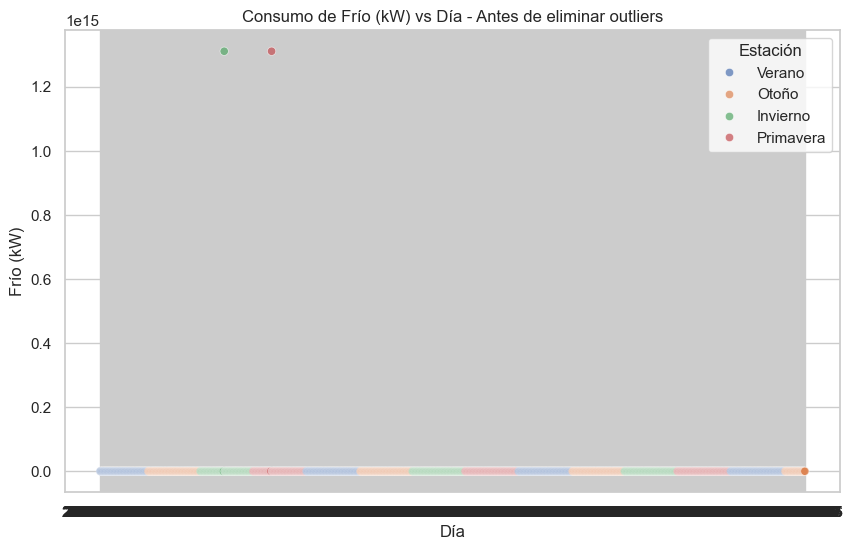

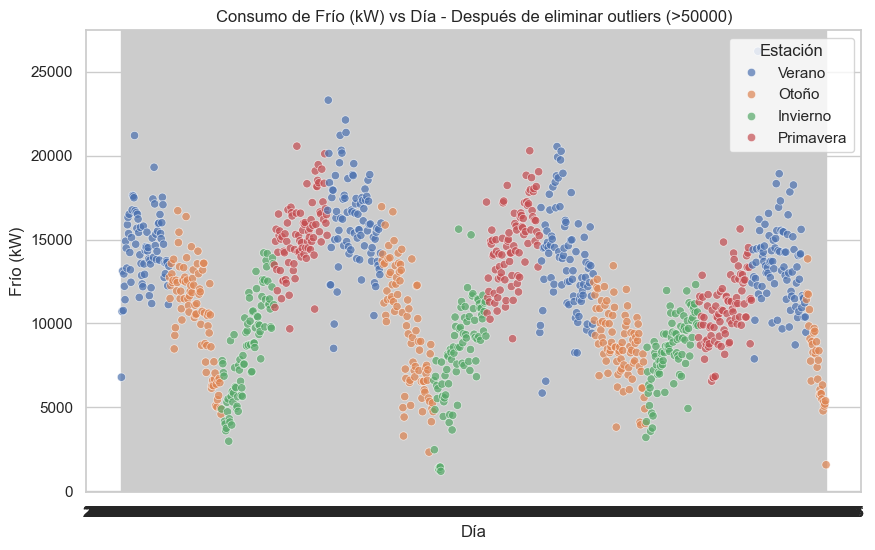

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Copia del dataset original
df_limpio = df.copy()

# Configuración de estilo
sns.set(style="whitegrid", palette="deep")

# --- GRAFICO ORIGINAL ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_limpio, x="DIA", y="Frio (Kw)", hue="ESTACION", alpha=0.7)
plt.title("Consumo de Frío (kW) vs Día - Antes de eliminar outliers")
plt.xlabel("Día")
plt.ylabel("Frío (kW)")
plt.legend(title="Estación")
plt.show()

# --- REEMPLAZO DE OUTLIERS ---
df_limpio.loc[df_limpio["Frio (Kw)"] > 50_000, "Frio (Kw)"] = pd.NA

# --- GRAFICO DESPUÉS DE ELIMINAR OUTLIERS ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_limpio, x="DIA", y="Frio (Kw)", hue="ESTACION", alpha=0.7)
plt.title("Consumo de Frío (kW) vs Día - Después de eliminar outliers (>50000)")
plt.xlabel("Día")
plt.ylabel("Frío (kW)")
plt.legend(title="Estación")
plt.show()
